In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#assign data frame to a variable 
profitby_c=pd.read_csv('Coffee_company.csv', index_col=0)

In [ ]:
#check columns
profitby_c.columns

In [4]:
#clean the columns 
profitby_c.columns=profitby_c.columns.str.replace(' ', '')

In [ ]:
#find which country is most profitable

#look at the data and clean it first
print(profitby_c['Country'].dtype)
profitby_c['Country'].head()
#the data in the country column has spacing, clean that
profitby_c['Country']=profitby_c['Country'].str.replace(' ', '')
profitby_c['Country'].head()

In [6]:
#clean the data in the profit column
profitby_c['Profit']=profitby_c['Profit'].str.replace('$', '').str.replace(',', '')

In [7]:
#change it to numeric
profitby_c['Profit']=pd.to_numeric(profitby_c['Profit'], errors='coerce')

In [ ]:
#reset index for grp
grp=profitby_c.groupby('Country')['Profit'].sum().reset_index()
grp.iloc[4, grp.columns.get_loc('Country')] = 'USA'
grp.head()

,Country,Profit
0,Belgium,8217814.04
1,China,8829187.57
2,Japan,10397722.36
3,Switzerland,9136975.00
4,USA,9557054.51


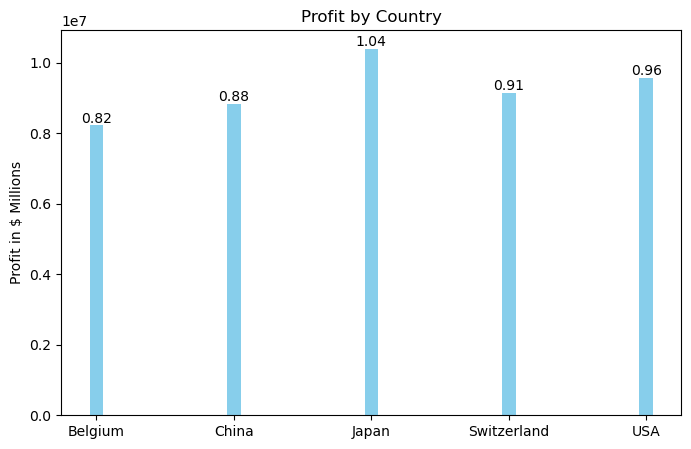

In [16]:
#bar plot
plt.figure(figsize=(8, 5))
plt.bar(x=grp['Country'], height=grp['Profit'], color='skyblue', width=0.1)
plt.title('Profit by Country')
plt.ylabel('Profit in $ Millions')
for i, value in enumerate(grp['Profit']):
    plt.text(i, value + 0.2, f'{(value/10000000):.2f}', ha='center', va='bottom')